# Harnessing Matplotlib & Astropy

Based off Notebook by Sarah Blunt

## Matplotlib.pyplot

`matplotlib` is a powerful graphics module often used by Python developers. I like to look at the matplotlib gallery to get a grasp for what is possible: https://matplotlib.org/stable/gallery/index.html. 

Goals of this tutorial:
  * Demonstrate some nice features of matplotlib for plotting
  * Understand the principles behind using the `matplotlib.pylab` environment

There are other (excellent) plotting tools in common practice in astronomy, especially plotly and bokeh. We encourage you to look into these tools as well, but we'll only discuss `matplotlib.pyplot` here.

## The `pyplot` environment

`matplotlib.pyplot` relies on the concept of **changing state**. The **state** of a programming environment is what determines the program's behavior. For example, when you type:

``` >> import  matplotlib.pyplot as plt```

you have loaded in a set of default matplotlib settings (which can be changed). These settings are in the `matplotlib.rcParams` object, which is like a dictionary that controls the default behaviors of matplotlib plots. When you type:

```>> import matplotlib```

the `matplotlib.rcParams` object is automatically defined and given some default values. This is how, for example, matplotlib knows how large to make fonts and what colors to draw lines. It also means that you can control the default behavior of matplotlib plots by updating state via `matplotlib.rcParams`.

Let's see an example. We'll start by using the `update()` method of `matplotlib.rcParams` to change the default font size:


In [ ]:
# allows us to display matplotlib figures as images in Jupyter
%matplotlib inline 

from matplotlib import rcParams
import matplotlib.pyplot as plt

# make a plot
plt.figure()
plt.title('The default font size is {}.'.format(rcParams['font.size']))
plt.xlabel('foo')
plt.ylabel('bar')

# update the current state. This command doesn't have any output! It just affects
#   the state of the environment.
old_default = rcParams['font.size']
rcParams.update({'font.size': 22})

# make another plot
plt.figure()
plt.title('Now, the default font size is {}.'.format(rcParams['font.size']))
plt.xlabel('foo')
plt.ylabel('bar', fontsize=10) # override default

# reset to old default
rcParams.update({'font.size': old_default})

### Figures

The basic "unit" of `matplotlib.pyplot` is [the `Figure` object](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html), which acts as a container for all the other plot elements. Let's look at a few different ways to create a `Figure` object:

In [ ]:
import numpy as np

# create some sample data
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
y_error = np.array([5, 1.2, 2, 5])

fig = plt.figure() # initializes a `Figure` object
plt.errorbar(      # plots data points and error bars onto the current `Figure`
    x, y, yerr=y_error, ls='', fmt="*"  # ls='' sets "no line" as the line style
                                   # fmt="*" sets stars as the data marker
)  

print(type(fig))

Note that the current figure changes (i.e. the *state* is updated) when you initialize a new `Figure` object. Unless you specify a particular `Figure` object, `plt.___()` functions will always add to the current `Figure` object. That is a nice feature-- it makes it easy to add multiple types of plots onto the same figure. But you should be mindful of what is the current figure.

Let's look at another way to initialize a new `Figure` object:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].plot(x, y, color='grey')
# plt.xlabel("x-axis") # if I uncomment this line, which axis do I write to?
axes[1].plot(x, y, color='red')
axes[1].set_yscale('log')
# plt.xlabel("y-axis") # if I uncomment this line, which axis do I write to?

print('fig type: {}'.format(type(fig)))
print('axes type: {}'.format(type(axes)))
print('axes[0] type: {}'.format(type(axes[0])))

Here we've encountered another kind of object: [the `Axes` object](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). These objects are containers for all the plot elements *in a particular figure panel*. Each figure can contain multiple `Axes` (or just one for a single plot).

Two useful methods to keep in mind are `plt.gca()` and `plt.sca()` (get/set current `Axes`). Let's see how they work:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)

mystery_axes = plt.gca()              # get current Axes
mystery_axes.scatter(x, y, color='r', label='he')# acts on `mystery_axes`
mystery_axes.scatter(x + 1, y + 1, color='k', label='llo')
mystery_axes.legend()

plt.sca(ax[0,0])        # set current Axes
plt.plot(x, y, ls='-.') # acts on current Axes
plt.tight_layout()      # prettify

## Some features for making readable plots

### Tweaking individual font sizes

For different sized figures, I prefer different fontsizes. For papers, I aim to have my figure fontsizes to be comparable to the text fontsize.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,3)) # specify a figure size
ax.set_title('The default font size is {}.'.format(rcParams['font.size']), fontsize=14)
ax.set_xlabel('Foo', fontsize=14)
ax.set_ylabel('Bar', fontsize=14)
ax.tick_params(labelsize=11)


### Controlling colors and labeling

There are many ways to specify colors in matplotlib
  * Use the default color cycle by not specifying anything in the colors
  * Specify colors from the color cycle
  * Use words (mainly those supported by HTML) for colors
  * Specific values from built-in matplotlib colormaps
  * Most custom: use Hex codes (or RGB tuples) to specify a color

Jason's preference: I like to either pick colors from the HTML supported table or pick a matplotlib colormap I like and use a few values from one colormap.

For labeling, using the `label` keyword, which is accessible through any plotting function (`plot`, `scatter`, `errorbar`, etc), and the `legend()` function is the easiest way to label plots in matplotlib.

In [ ]:
import matplotlib

plt.figure()
## use the default color cycle
plt.plot(x, y, label="Default 1")
plt.plot(x, y-x, label="Default 2") 
## you can also grab colors you like from the color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
cycle_colors = prop_cycle.by_key()['color']
plt.plot(x, y+x, c=cycle_colors[4], label="Default 4")
# you can also specify any HTML color name (https://www.w3schools.com/colors/colors_names.asp)
plt.plot(x, y - 5, c="LightSeaGreen", label="HTML Color")
# you can grab values from colormaps
inferno_cmap = matplotlib.cm.get_cmap("inferno")
inferno_color = inferno_cmap(0.2) # any value between 0 and 1
plt.plot(x, 22 - 0.8 * y, c=inferno_color, label="Colormap Color")
# you can also specify colors using the Hex color code
plt.plot(x, 20 - y, c="#ED55A1", label="Hex Color")

plt.legend(loc="lower right")
plt.xlim(0.9, 4.1)
plt.ylim(-5, 22)

Direct labeling is possible but is a bit clumsy. I prefer to use `annotate` with the `xytest` and `textcoords` keywords to specify an offset in units of points (very matplotlib specific unit). 

In [ ]:
fig = plt.figure(figsize=(6,3.5))
## use the default color cycle
plt.plot(x, y)
plt.annotate("Default 1", (x[-1], y[-1]), xytext=(10, -2), textcoords="offset points", fontsize=12)
plt.plot(x, y-x) 
plt.annotate("Default 2", (x[-1], (y-x)[-1]), xytext=(10, 0), textcoords="offset points", fontsize=12)
## you can also grab colors you like from the color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
cycle_colors = prop_cycle.by_key()['color']
plt.plot(x, y+x, c=cycle_colors[4])
plt.annotate("Default 4", (x[-1], (y+x)[-1]), xytext=(10, -2), textcoords="offset points", fontsize=12)
# you can also specify any HTML color name (https://www.w3schools.com/colors/colors_names.asp)
plt.plot(x, y - 5, c="LightSeaGreen")
plt.annotate("HTML Color", (x[-1], (y - 5)[-1]), xytext=(10, -3), textcoords="offset points", fontsize=12)
# you can grab values from colormaps
inferno_cmap = matplotlib.cm.get_cmap("inferno")
inferno_color = inferno_cmap(0.2) # any value between 0 and 1
plt.plot(x, 22 - 0.8 * y, c=inferno_color)
plt.annotate("Colormap Value", (x[-1], (22 - 0.8 * y)[-1]), xytext=(10, -2), textcoords="offset points", fontsize=12)
# you can also specify colors using the Hex color code
plt.plot(x, 20 - y, c="#ED55A1")
plt.annotate("Hex Color", (x[-1], (20 - y)[-1]), xytext=(10, -2), textcoords="offset points", fontsize=12)

plt.xlim(0.9, 5.5)
plt.ylim(-5, 22)

### Saving Plots

Generally I only save plots in two different formats: PDF or PNG/JPEG. PDF is a vectorized format, where all the text and lines and points are saved to exact precision. This means you can keep zooming in and it will not look pixelated. PNG/JPEG is a rasterized format, meaning it saves a 2D image at some predefined resolution per pixel. 

Vectorized format generally looks nicer, but can make the file huge (if you have millions of datapoints, each individual data point is saved separately) and is not supported in all applications. Rasterized images are generally easier to use, but have a limiting resolution. 

In [ ]:
fig.savefig("example.pdf")
fig.savefig("example.png", dpi=300)


### General tips:

- **Apply principles of good design.** This means using color palettes with lots of contrast, making your fonts large and easy-to-read, and making sure your plots are colorblind friendly. (There are several great colorblindness simulators out there, for example [this one](https://www.color-blindness.com/coblis-color-blindness-simulator/).) It's also good to differentiate plot elements in more than one way (ex: one line is black and dashed, another is red and solid). (See our slides for more discussion)\
- **Use declared `Figure` and `Axes` objects** The `plt` interface is very convienient, but, especially when creating multiple panel plots, use the `Figure` and `Axes` objects to explicitly declare which plot you are plotting on. The array of axes (`Figure.axes`) can also be used for iteration with other lists/arrays.
- **Plotting with Jupyter notebooks is useful for tweaks** I like to use Jupyter notebooks for plotting, since I can run a single cell to tweak parameters of a plot quickly. 

## Matplotlib Actvitiy

Below I downloaded Google trends on a few different popular search terms and did a quick plot. Check the plot to see if it is colorblind-friendly, change any colors as needed (or as desired), and make the plot more interesting!

### Product:
- Paste your plot in the Canvas discussion thread to share with others!

### Instructions

  * Look through the code below
  * Save the figure, and use a [colorblindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) to assess if it is colorblind friendly
  * Change any colors to make it more accessible, and/or to be in more in-line with your design preferences. 
  * Make the plot more interesting/more foucsed/more well-designed.
  * Share it on the Canvas discussion thread

In [ ]:
import pandas as pd
import astropy.time
df = pd.read_csv("google_trends.csv")

# turn YYYY-MM into a fractional year
decimal_years = []
for year_month in df['Month']:
    year, month = year_month.split("-")
    decimal_years.append(int(year) + (int(month)-1)/12)
# add it as a column
df['decimalyear'] = pd.Series(decimal_years)
print(df)

# plotting code
fig, ax = plt.subplots(1, 1)
ax.plot(df['decimalyear'], df['Cupcake'], 'b-', label='Cupcake')
ax.plot(df['decimalyear'], df['Katy Perry'], 'r-', label='Katy Perry')
ax.plot(df['decimalyear'], df['How to cook'], 'g-', label='How to cook')
ax.plot(df['decimalyear'], df['Trees'], 'y-', label='Trees')
ax.set_ylabel("Relative Popularity")
ax.set_xlabel("Time (year)")
ax.set_title("Popularity of Search Term on Google (Worldwide)")
ax.legend(loc='upper right')


### Answers

See other student's plots here: https://canvas.northwestern.edu/courses/176474/discussion_topics/1186563

# Astropy

`astropy` is full of useful stuff for astronomers (perhaps unsurprisingly). The main point I want to drive home with this tutorial is **DON'T REINVENT THE WHEEL**. Before you write a new function, especially one that performs a common astronomical task, check whether an `astropy` developer wrote it for you. `astropy` functions are well-tested, especially for complicated calculations like coordinate transformations or unit conversions. 

This tutorial is far from exhaustive. Check out a more complete list of `astropy` tutorials [here](https://learn.astropy.org/).

Below are some examples of a few particularly useful `astropy` features. 

### Units

One of my favorite things about `astropy` is its ability to handle units and fundamental constants. Let's calculate the Earth's orbital velocity using the equation 

$v = \sqrt{GM_\odot/r}$.

In [1]:
import numpy as np
from astropy import constants as cst, units as u 

v_Earth = np.sqrt(
    cst.G * 
    cst.M_sun / 
    (1 * u.au)
)

print(v_Earth)

11520088541.326408 m(3/2) / (AU(1/2) s)


Well those units aren't very helpful. Let's convert them to more physical units:

In [ ]:
v_Earth_cgs = v_Earth.cgs
v_Earth_km_s = v_Earth.to(u.km/u.s)

print("Earth's orbital velocity: {0:.2e}.".format(v_Earth_cgs))
print("Another way to put it: {0:.1f}.".format(v_Earth_km_s))

The `equivalencies` keyword in the `.to()` function is also very useful to convert between things that have a 1:1 mapping, but don't share the same units. Some that I use are: wavelength to frequency, parallax to distance, $F_\nu$ to $F_\lambda$. 

There's a list of supported ones here: https://docs.astropy.org/en/stable/units/equivalencies.html#unit-equivalencies

In [ ]:
# convert 10 microns to Hz
(10 * u.um).to(u.Hz, equivalencies=u.spectral())  

### Time

Next, let's do an example with the bane of every astronomer's existence: time.

In [ ]:
from astropy.time import Time 

some_date = Time('1995-02-03', format='iso')

print('As a fractional year: {0}.'.format(some_date.decimalyear))
print('In JD: {0}.'.format(some_date.jd))
print('In MJD: {0}.'.format(some_date.mjd))

### Coordinates

Next, a quick example with the second-worst bane of every astronomer's existence: coordinate systems. `astropy` has a great `coordinates` module that enables easy translation between coordinate systems:

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u

# input coordinates as hour angle and degree
my_coordinate = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

# access right ascension
print(my_coordinate)

# convert to galactocentric coordinates
print(my_coordinate.galactic)

# get a second coordinate and measure distance
second_coordinate = SkyCoord('01:01.2 +42:45', unit=(u.hourangle, u.deg))

distance = my_coordinate.separation(second_coordinate)
print("Separation between the coordinates", distance.to(u.deg))

### FITS files

As a final example, we will use astropy to read a .fits file and access its contents. 

FITS files are often used in astronomy to store image data and relevant keywords. As an example, suppose I want to store a set of data containing images of the same object taken at 450, 600, and 700 nm wavelengths. fits files allow me to store all of these images in one file (each one is stored in a different "extension"), along with relevant keywords (e.g. the name of the object, time of observation, etc) in the fits file "header." Feel free to Google around for more information about fits files!

In Python, when using files (or other system I/O), it is good practice to access them with the `with` command. The `with` command automatically handles opening and closing files, so you don't have to worry about such things. It is good to close files after youuse them so it doesn't take up memory, or mess with other programs also trying to access those files.

In [ ]:
from astropy.io import fits

# open a test fits file
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
with fits.open(fits_image_filename) as hdul:

    # print a summary of the file contents
    print('\n\nINFO ABOUT FITS FILE:')
    print('---------------------')
    hdul.info()

    # print the contents of the .fits header
    print('\n\nFITS HEADER:')
    print('------------')
    print(repr(hdul[0].header))

    # closes the file automatically

## Astropy Activities

Work on these independently, but ask a classmate or the instructor if you get stuck. 

### Activity

Here is how we can generate a blackbody spectrum in `astropy`. Assuming the emitting area on the sky is $\pi r^2$ where $r = 0.05~\textrm{arcsec}$, plot the blackbody spectrum in Janskys.

If you have done that, also plot it with the following units:
  * $F_\lambda$ space in units of $W/m^2/\mu m$. 
  * $\textrm{photons}/s/m^2/\mu m$


Text(0, 0.5, 'Flux (ph / (m2 s um))')

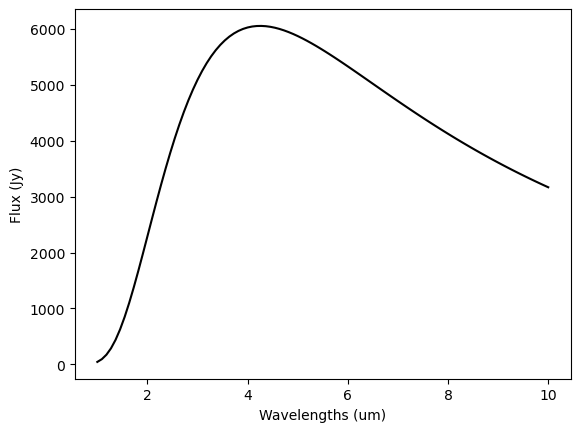

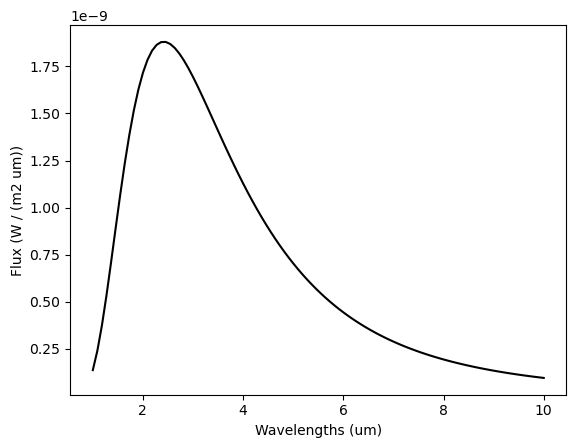

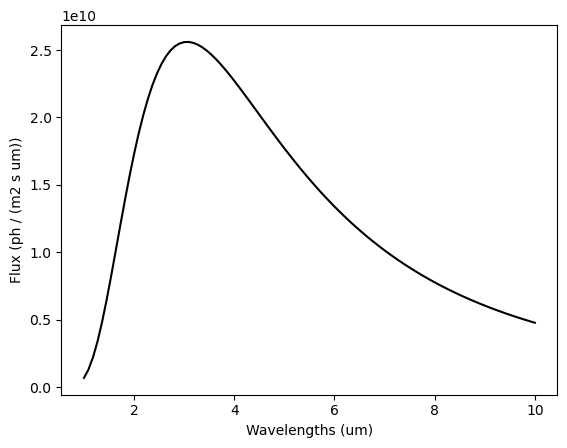

In [5]:
from astropy.modeling.models import BlackBody
import matplotlib.pylab as plt

wavelengths = np.linspace(1, 10, 100) * u.um # 1 to 10 microns
bb_temp = 1200 * u.K
bb = BlackBody(temperature=bb_temp)
emitting_area = np.pi * (0.05 * u.arcsec)**2 # solid angle in the sky

bb_intensity = bb(wavelengths)

flux_jy = (emitting_area * bb_intensity).to(u.Jy)

plt.figure()
plt.plot(wavelengths, flux_jy, 'k-')
plt.xlabel("Wavelengths ({0})".format(wavelengths.unit))
plt.ylabel("Flux ({0})".format(flux_jy.unit))

flux_flam = flux_jy.to(u.W/u.m**2/u.um, equivalencies=u.spectral_density(wavelengths))

plt.figure()
plt.plot(wavelengths, flux_flam, 'k-')
plt.xlabel("Wavelengths ({0})".format(wavelengths.unit))
plt.ylabel("Flux ({0})".format(flux_flam.unit))

flux_photons = flux_flam.to(u.photon/u.s/u.m**2/u.um, equivalencies=u.spectral_density(wavelengths))

plt.figure()
plt.plot(wavelengths, flux_photons, 'k-')
plt.xlabel("Wavelengths ({0})".format(wavelengths.unit))
plt.ylabel("Flux ({0})".format(flux_photons.unit))